### Part 1: Compare Linear regression, Polynomial regression and local regression using AirQualityUCI data set

The AirQualityUCI data set contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

In [1]:
import pandas as pd

AirQualityUCI = pd.read_csv('AirQualityUCI.csv')
print(AirQualityUCI)

      Unnamed: 0     Date      Time  HourlyCO  PT08_S1   NMHC  Benzene  \
0              1  3/10/04  18:00:00       2.6   1360.0  150.0     11.9   
1              2  3/10/04  19:00:00       2.0   1292.0  112.0      9.4   
2              3  3/10/04  20:00:00       2.2   1402.0   88.0      9.0   
3              4  3/10/04  21:00:00       2.2   1376.0   80.0      9.2   
4              5  3/10/04  22:00:00       1.6   1272.0   51.0      6.5   
...          ...      ...       ...       ...      ...    ...      ...   
9466        9467      NaN       NaN       NaN      NaN    NaN      NaN   
9467        9468      NaN       NaN       NaN      NaN    NaN      NaN   
9468        9469      NaN       NaN       NaN      NaN    NaN      NaN   
9469        9470      NaN       NaN       NaN      NaN    NaN      NaN   
9470        9471      NaN       NaN       NaN      NaN    NaN      NaN   

      PT08_S2    NOx  PT08_S3    NO2  PT08_S4  PT08_S5  Temp  RelHumidity  \
0      1046.0  166.0   1056.0  113

1. Remove all the missing values and the first two columns from the data. Split the data into training(80%) and testing(20%) data.

In [306]:
# check how many missing values in each column
AirQualityUCI.isna().sum()

Unnamed: 0        0
Date            114
Time            114
HourlyCO       1797
PT08_S1         480
NMHC           8557
Benzene         480
PT08_S2         480
NOx            1753
PT08_S3         480
NO2            1756
PT08_S4         480
PT08_S5         480
Temp            480
RelHumidity     480
AbsHumidity     480
X              9471
X.1            9471
dtype: int64

In [2]:
# drop first three columns and columns with significant portion of data missing
AirQualityUCI = AirQualityUCI.drop(['Unnamed: 0', 'Date', 'Time', 'NMHC', 'X', 'X.1'], axis=1)

# drop rows where all the columns are missing data
AirQualityUCI.dropna(how='all', inplace=True)

In [3]:
# check how much data is missing for every row
AirQualityUCI.isna().sum()

HourlyCO       1652
PT08_S1         335
Benzene         335
PT08_S2         335
NOx            1608
PT08_S3         335
NO2            1611
PT08_S4         335
PT08_S5         335
Temp            335
RelHumidity     335
AbsHumidity     335
dtype: int64

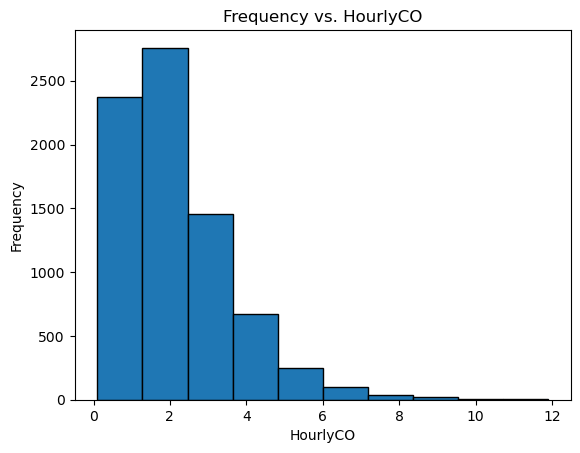

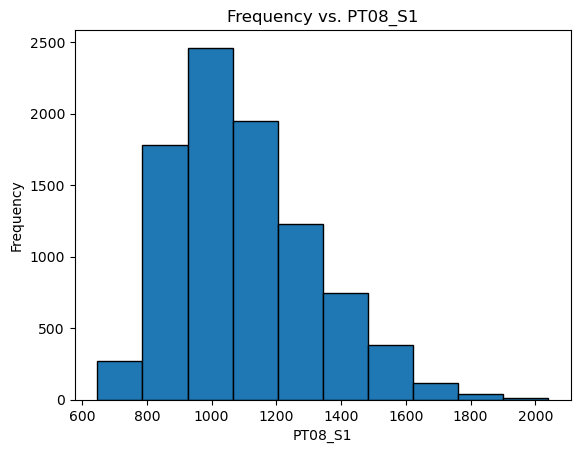

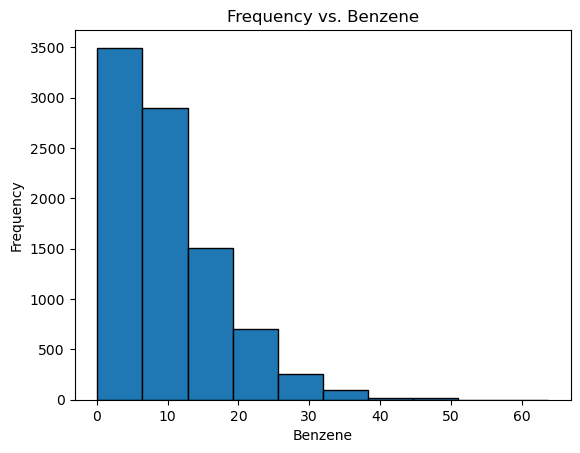

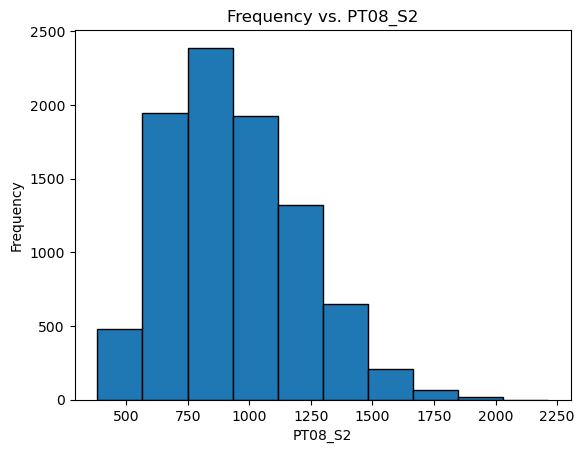

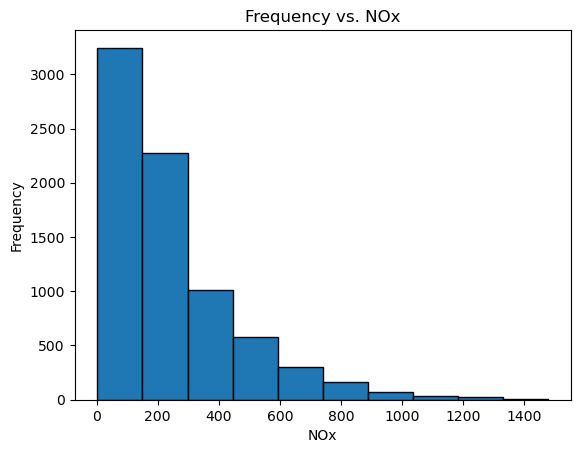

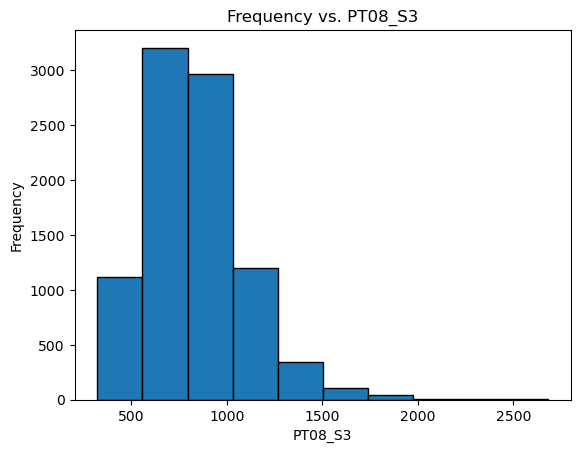

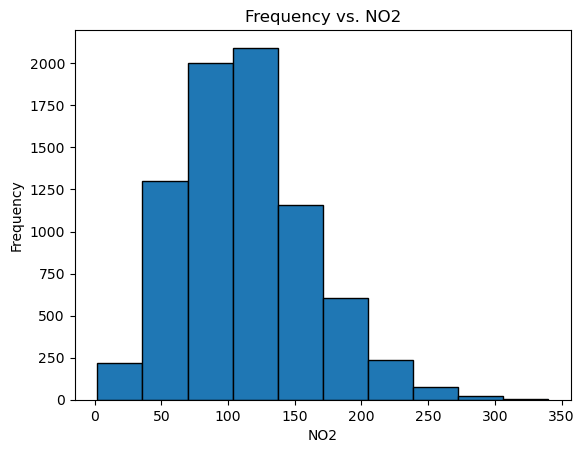

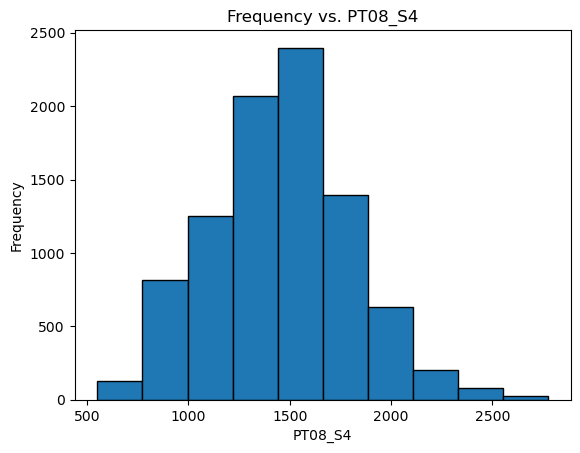

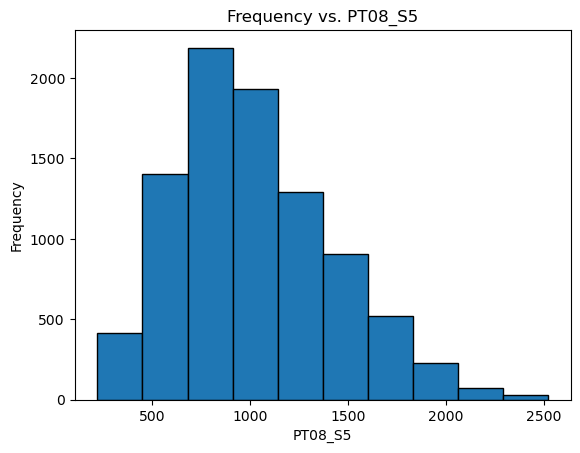

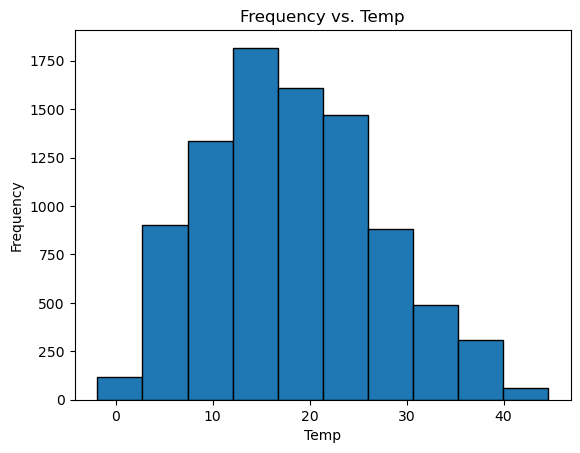

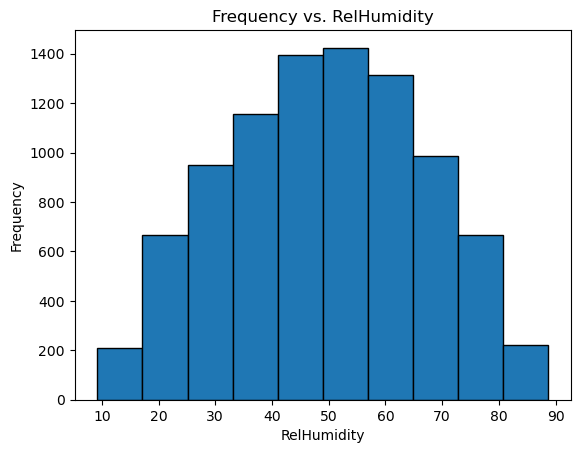

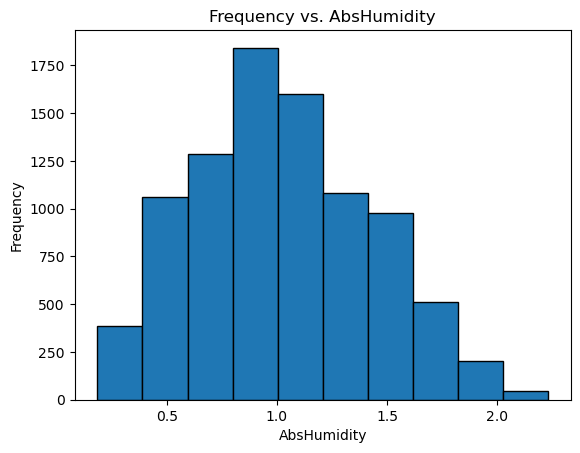

In [4]:
import matplotlib.pyplot as plt

# find distribution of all columns to determine how to fill missing values for each column
for col in AirQualityUCI.columns:
    plt.hist(AirQualityUCI[col], bins=10, edgecolor='k')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title(f'Frequency vs. {col}')
    plt.show()

In [5]:
# for columns with normal distributions fill in missing values using the mean
for col in ['AbsHumidity', 'RelHumidity', 'Temp', 'PT08_S4']:
    mean = AirQualityUCI[col].mean()
    AirQualityUCI[col].fillna(mean, inplace=True)

# for columns with skewed distributions fill in missing values using the median
for col in ['PT08_S5', 'NO2', 'NOx', 'PT08_S2', 'PT08_S1', 'Benzene', 'HourlyCO']:
    median = AirQualityUCI[col].median()
    AirQualityUCI[col].fillna(median, inplace=True)

# for columns with lots of repeating data fill in missing values using the mode
for col in ['PT08_S3']:
    mode = AirQualityUCI[col].mode().iloc[0]
    AirQualityUCI[col].fillna(mode, inplace=True)

In [6]:
# confirm there is no more missing values in the dataset
AirQualityUCI.isna().sum()

HourlyCO       0
PT08_S1        0
Benzene        0
PT08_S2        0
NOx            0
PT08_S3        0
NO2            0
PT08_S4        0
PT08_S5        0
Temp           0
RelHumidity    0
AbsHumidity    0
dtype: int64

In [7]:
print(AirQualityUCI)

      HourlyCO  PT08_S1  Benzene  PT08_S2    NOx  PT08_S3    NO2  PT08_S4  \
0          2.6   1360.0     11.9   1046.0  166.0   1056.0  113.0   1692.0   
1          2.0   1292.0      9.4    955.0  103.0   1174.0   92.0   1559.0   
2          2.2   1402.0      9.0    939.0  131.0   1140.0  114.0   1555.0   
3          2.2   1376.0      9.2    948.0  172.0   1092.0  122.0   1584.0   
4          1.6   1272.0      6.5    836.0  131.0   1205.0  116.0   1490.0   
...        ...      ...      ...      ...    ...      ...    ...      ...   
9352       3.1   1314.0     13.5   1101.0  472.0    539.0  190.0   1374.0   
9353       2.4   1163.0     11.4   1027.0  353.0    604.0  179.0   1264.0   
9354       2.4   1142.0     12.4   1063.0  293.0    603.0  175.0   1241.0   
9355       2.1   1003.0      9.5    961.0  235.0    702.0  156.0   1041.0   
9356       2.2   1071.0     11.9   1047.0  265.0    654.0  168.0   1129.0   

      PT08_S5  Temp  RelHumidity  AbsHumidity  
0      1268.0  13.6        

### After removing the last two columns and handling all missing values, 8991 rows x 12 columns remain.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = AirQualityUCI.drop('HourlyCO', axis=1)
y = AirQualityUCI.HourlyCO

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. Predict the HourlyCO in the data using all the other variables. Fit a linear regression model and report the MSE. 

In [9]:
# create linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X_train, y_train)

# predict y
y_pred = lm.predict(X_test)

# report MSE
MSE = mean_squared_error(y_pred, y_test)
print('MSE:', MSE)

MSE: 0.3363669331890882


3. Now fit a polynomial regression model with degree 2. Report the MSE.  

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# transform feature data into polynomial feature data with specified degree
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# create a linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X_poly_train, y_train)

# predict y
y_pred = lm.predict(X_poly_test)

# report the MSE
MSE = mean_squared_error(y_pred, y_test)
print('MSE:', MSE)

MSE: 0.28107479634847166


4. Keep increasing the degree to 3. How does the MSE change and why?

In [11]:
# transform feature data into polynomial feature data with specified degree
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# create a linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X_poly_train, y_train)

# predict y
y_pred = lm.predict(X_poly_test)

# report the MSE
MSE = mean_squared_error(y_pred, y_test)
print('MSE:', MSE)

MSE: 0.3191586739520693


### The MSE increases when I increase the degree to 3 because the model is beginning to overfit to the data (less biased model = more variance).

### Part 2: Compare Regularization methods: Lasso (L1), Ridge (L2), and Elastic Net

1. We may not want to use all the features in the dataset and it seems that some features are not independent with each other. Therefore, we want to apply the regularization methods. Briefly describe L1, L2, and Elastic net regression, and their differences. 

### Lasso, or L1 regularization, adds the absolute values of the regression coefficients as a penalty term to the loss function. This results in sparse models and feature selection because some coefficients become exactly zero.

### Ridge, or L2 regularization, adds the squares of the regression coefficients as a penalty term to the loss function. Coefficients shrink to zero but rarely become zero, thus this model is helpful in reducing multicollinearity. 

### Elastic net regression combines the advantages of Lasso and Ridge and can thus select representative features from highly correlated features. 

3. Fit Lasso model with the best tuning parameter. Report MSE. Print the table for the coefficients.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# scale the data 
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# tune the value of alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv = 10, 
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)
best_alpha = grid_search.best_params_['alpha']
print('best alpha:', best_alpha)

best alpha: 0.001


In [33]:
# fit lasso with best tuning parameter
lasso_model = Lasso(alpha = best_alpha)
lasso_model.fit(X_train_scale, y_train)
y_pred = lasso_model.predict(X_test_scale)

# report MSE
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)

# print table for coefficients
coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Feature'] 
coef_df['Coefficient Estimate'] = pd.Series(lasso_model.coef_)
print(coef_df)

MSE: 0.34515668182806153
        Feature  Coefficient Estimate
0       PT08_S1              0.192297
1       Benzene              0.375894
2       PT08_S2             -0.236362
3           NOx              0.694578
4       PT08_S3              0.028191
5           NO2              0.115882
6       PT08_S4              0.567387
7       PT08_S5             -0.134722
8          Temp             -0.116732
9   RelHumidity             -0.095675
10  AbsHumidity             -0.117832


4. Fit Ridge model with the best tuning parameter. Report MSE. Print the table for the coefficients.

In [34]:
# tune the value of alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv = 10, 
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)

best_alpha = grid_search.best_params_['alpha']
print('best alpha:', best_alpha)

best alpha: 1


In [35]:
# fit ridge with best tuning parameter
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(X_train_scale, y_train)
y_pred = ridge_model.predict(X_test_scale)

# report MSE
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)

# print table for coefficients
coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Feature'] 
coef_df['Coefficient Estimate'] = pd.Series(ridge_model.coef_)
print(coef_df)

MSE: 0.3452978038742993
        Feature  Coefficient Estimate
0       PT08_S1              0.199554
1       Benzene              0.442530
2       PT08_S2             -0.338290
3           NOx              0.698951
4       PT08_S3              0.012468
5           NO2              0.119033
6       PT08_S4              0.592902
7       PT08_S5             -0.141225
8          Temp             -0.126674
9   RelHumidity             -0.107651
10  AbsHumidity             -0.120970


5. Fit Elastic net model with the best tuning parameter. Report MSE. Print the table for the coefficients. 

In [36]:
from sklearn.linear_model import ElasticNet

# tune the value of alpha and l1_ratio
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratio = [0.001, 0.01, 0.1, 0.5, 0.9, 0.99]
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratio}

EN_model = ElasticNet()
grid_search = GridSearchCV(EN_model, param_grid, cv = 10, 
                           scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print('best alpha:', best_alpha)
print('l1 ratio:', best_l1_ratio)

best alpha: 0.001
l1 ratio: 0.001


In [19]:
# fit EN with best tuning parameter
EN_model = ElasticNet(alpha = best_alpha, l1_ratio = best_l1_ratio)
EN_model.fit(X_train_scale, y_train)
y_pred = EN_model.predict(X_test_scale)

# report MSE
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)

# print table for coefficients
coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Feature'] 
coef_df['Coefficient Estimate'] = pd.Series(EN_model.coef_)
print(coef_df)

MSE: 0.34512186945027257
        Feature  Coefficient Estimate
0       PT08_S1              0.199745
1       Benzene              0.419598
2       PT08_S2             -0.300989
3           NOx              0.695866
4       PT08_S3              0.019531
5           NO2              0.119408
6       PT08_S4              0.582048
7       PT08_S5             -0.140925
8          Temp             -0.126230
9   RelHumidity             -0.105472
10  AbsHumidity             -0.116612


### Part 3: Implement Gradient Descent for Ridge

Apply the Air quality data to make sure it works. 

In [45]:
import numpy as np

# implement gradient descent for ridge 
# lambda_reg = tuning parameter alpha

def compute_cost(predictions, y, lambda_reg, theta):
    # mse + ridge penalty 
    mse = np.mean(np.square(predictions - y))
    cost = mse + lambda_reg * np.sum(np.square(theta))
    return cost

def gradient_descent(X_b, y, theta, learning_rate, num_iterations, lambda_reg):
    n = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        
        # prediction =
        predictions = np.dot(X_b, theta)

        # error = 
        error = predictions - y

        # gradient = 
        gradient = (1/n) * np.dot(X_b.T, error) + 2 * lambda_reg * theta
        
        # theta = theta - alpha * gradient
        theta -= learning_rate * gradient

        # update cost history
        cost_history[i] = compute_cost(predictions, y, lambda_reg, theta)
    
    return theta, cost_history

In [46]:
# test gradient descent implementation with air quality data
learning_rate = 0.01
num_iterations = 1000
lambda_reg = 0.01

theta = np.zeros(X_test.shape[1])

test = gradient_descent(X_train_scale, y_train, theta, learning_rate, num_iterations, lambda_reg) 

MSE = mean_squared_error(y_pred, y_test)
print('MSE:', MSE) 

MSE: 0.3452978038742993
